In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn.cluster import KMeans

In [2]:
ds= pd.read_csv("D:\Downloads\IRIS.csv")

In [3]:
ds

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
ds.shape

(150, 5)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
ds.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
ds['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
iris = pd.DataFrame(ds)
iris_ds = iris.drop(columns=['species'])

In [10]:
iris_ds

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
wcluster_sumofsquare = []

cluster_range = range(1,15)
for k in cluster_range:
    km = KMeans(n_clusters = k)
    km = km.fit(iris_ds)
    wcluster_sumofsquare.append(km.inertia_)

C:\Users\alvin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\alvin\AppData\Local\Temp\ipykernel_8104\3142206838.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(cluster_range, wcluster_sumofsquare, 'go-', color='coral')


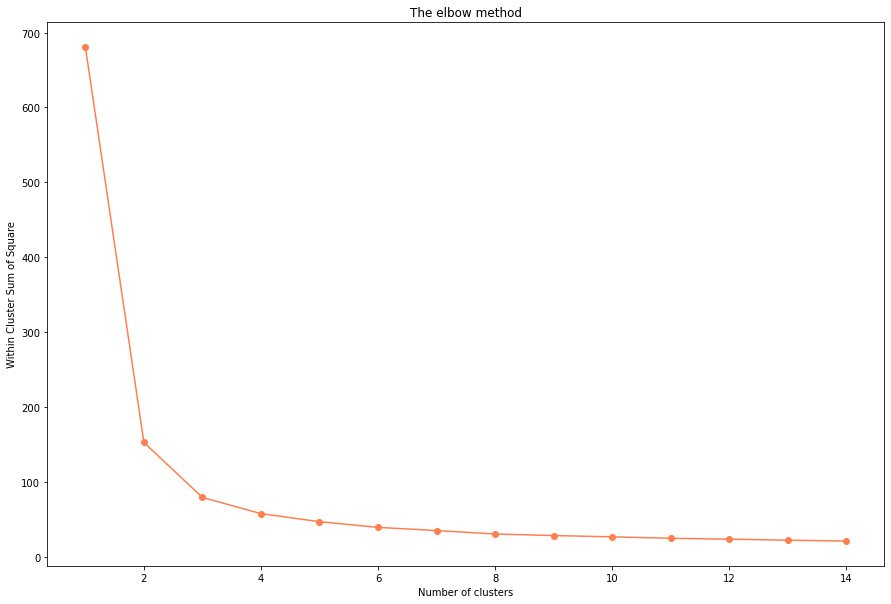

In [21]:
plt.rcParams["figure.figsize"] = [15,10]

plt.plot(cluster_range, wcluster_sumofsquare, 'go-', color='coral')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Square')

plt.show()

In [13]:
km_model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

predictions = km_model.fit_predict(iris_ds)

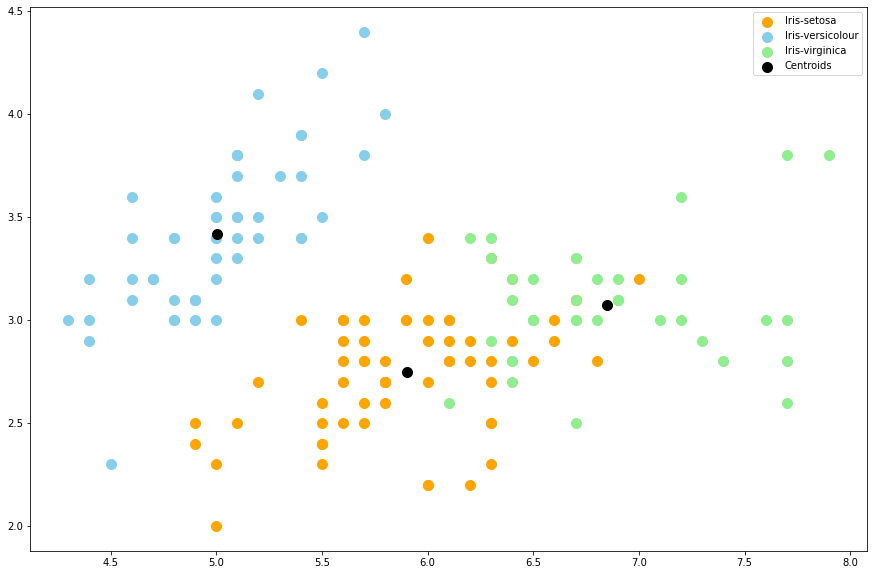

In [20]:
x = iris_ds.iloc[:, [0,1,2,3]].values

plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 100, color = 'orange', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 100, color = 'skyblue', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 100, color = 'lightgreen', label = 'Iris-virginica')

plt.scatter(km_model.cluster_centers_[:, 0], km_model.cluster_centers_[:,1], s = 100, color = 'black', label = 'Centroids')

plt.legend()

plt.show()